# Fractal Image Generator
This notebook generates Julia Set fractals.

#### 1. Initialization

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


def compute_next(z: complex, const: complex) -> complex:
    return z**2 + const


def compute_iterations(z0: complex, const: complex, max_iterations: int, threshold=4) -> int:
    zn = z0
    iterations = 0
    while (abs(zn) <= threshold and iterations < max_iterations):
        zn = compute_next(zn, const)
        iterations += 1
    return iterations


def generate_fractle(const: complex, resolution: tuple = (1080, 1920), scale_multiplier=3.5) -> np.ndarray:
    img = np.zeros(resolution, dtype='int')
    scale = 1/img.shape[1]*scale_multiplier
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x = (i-img.shape[0]/2)*scale
            y = (j-img.shape[1]/2)*scale
            z0 = complex(y, x)
            img[i, j] = compute_iterations(z0, const, 255, 2)
    return img


#### 2. Useful Constants

In [2]:
const = complex(-0.5251993, -0.5251993)

rtest = (240, 427)
rsd = (480, 854)
rhd = (720, 1280)
rfull_hd = (1080, 1920)
r4k = (2160, 3840)

#### 3. Generate the Fractle Image

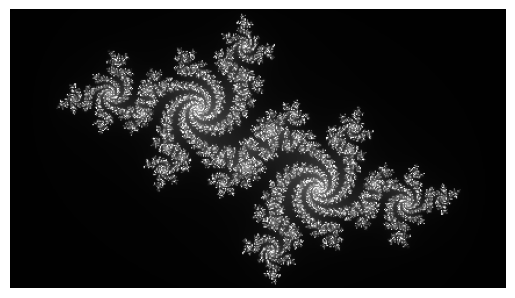

In [3]:
img = generate_fractle(const=const, resolution=rtest)

plt.axis(False)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

#### 4. Save the Fractle Image

In [4]:
name = 'images/fractal.png'
cv2.imwrite(name, img)

True